# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [29]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [30]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')

        # YOUR CODE HERE
        positions[0]=0
        for i in range (1, n+1):
            positions[i] = positions[i-1]+self.pickStep()
        return positions

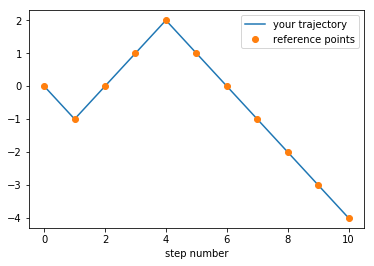

In [31]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

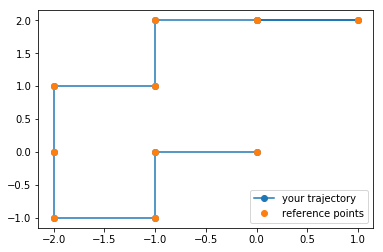

In [32]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

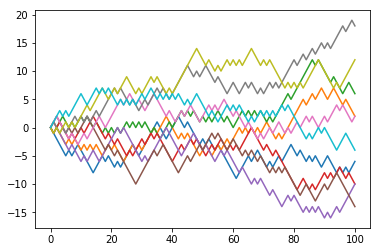

In [33]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


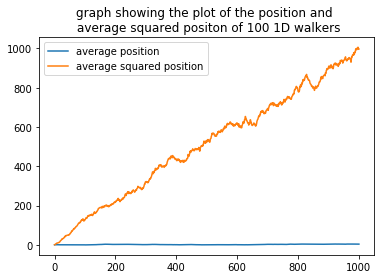

In [41]:
nsteps = 1000
ndim = 1
nwalkers = 100

toty_val=[]
toty_valsq=[]
for i in range(100):
    walk = walker(numpy.zeros(1))
    y_values = walk.doSteps(nsteps) 
    toty_val.append(y_values )
    toty_valsq.append(y_values**2)
plt.figure()
plt.plot(range(nsteps+1), numpy.average(toty_val, axis=0), label='average position')
plt.plot(range(nsteps+1), numpy.average(toty_valsq, axis=0), label='average squared position')
plt.title('graph showing the plot of the position and \n average squared positon of 100 1D walkers')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


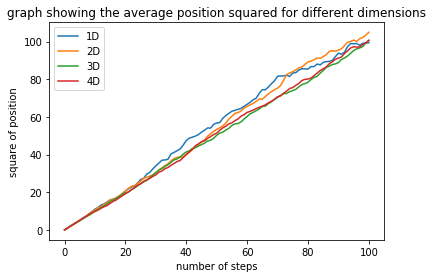

In [53]:
nsteps = 100
nwalkers = 400
dimensions = range(1,5)

y=[]                                          
ysq=[]

y2=[]
ysq2=[]
mag2 =[]

y3=[]
ysq3=[]
mag3 =[]

y4=[]
ysq4=[]
mag4 =[]

for i in range(nwalkers):
    walk = walker(numpy.zeros(1), ndim=1)
    ys = walk.doSteps(nsteps)
    y.append(ys)
for i in y:
    ysquared = i**2
    ysq.append(ysquared)
    yaveragesq = numpy.average(ysq, axis = 0)

plt.plot(range(nsteps+1),yaveragesq, label =  '1D')


for i in range(nwalkers):
    walk = walker(numpy.zeros(2), ndim=2)
    ys = walk.doSteps(nsteps)
    y2.append(ys)

for i in y2:
    ysquared = i**2
    ysq2.append(ysquared)
    yaveragesq2 = numpy.average(ysq2, axis = 0)

for j in range(nsteps+1):
    valmag = yaveragesq2[j][0] + yaveragesq2[j][1]
    mag2.append(valmag)
plt.plot(range(nsteps+1),mag2, label =  '2D')



for i in range(nwalkers):
    walk = walker(numpy.zeros(3), ndim=3)
    ys = walk.doSteps(nsteps)
    y3.append(ys)
    
for i in y3:
    ysquared = i**2
    ysq3.append(ysquared)
    yaveragesq3 = numpy.average(ysq3, axis = 0)
    
for j in range(nsteps+1):
    valmag = yaveragesq3[j][0] + yaveragesq3[j][1] + yaveragesq3[j][2]
    mag3.append(valmag)
plt.plot(range(nsteps+1),mag3, label =  '3D')



for i in range(nwalkers):
    walk = walker(numpy.zeros(4), ndim=4)
    ys = walk.doSteps(nsteps)
    y4.append(ys)

for i in y4:
    ysquared = i**2
    ysq4.append(ysquared)
    yaveragesq4 = numpy.average(ysq4, axis = 0)
    
for j in range(nsteps+1):
    valmag = yaveragesq4[j][0] + yaveragesq4[j][1] + yaveragesq4[j][2] + yaveragesq4[j][3]
    mag4.append(valmag)
plt.plot(range(nsteps+1),mag4, label =  '4D')
plt.legend()
plt.xlabel('number of steps')
plt.ylabel('square of position')
plt.title('graph showing the average position squared for different dimensions')
plt.show()

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


Text(0.5,1,'particles position after 500 steps')

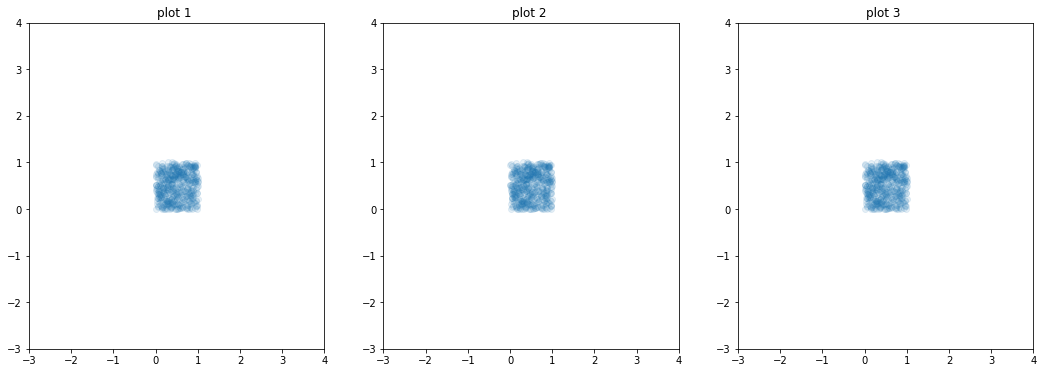

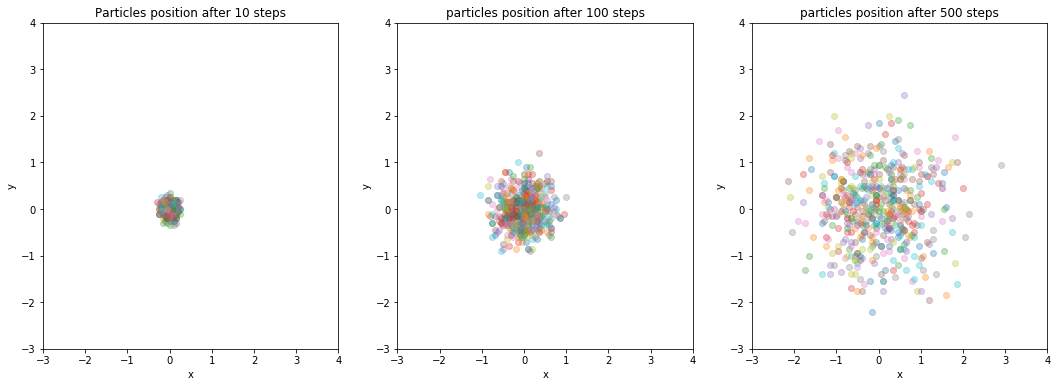

In [63]:
ndim=2
nwalkers=500

rand_pos = numpy.random.uniform(size=(nwalkers, ndim))

# this code is a template to create 3 subplots in one, adapt it to your task!
plt.figure(figsize=(18,6))
for i, nsteps in enumerate([10,100,500]):
    plt.subplot(131+i)
    plt.xlim((-3, 4))
    plt.ylim((-3, 4))
    plt.title("plot {} ".format(i+1))    
    plt.scatter(rand_pos[:,0], rand_pos[:,1], alpha=0.1)


plt.figure(figsize=(18,6))
pos_10=[0]*1000
pos_100=[0]*1000
pos_500=[0]*1000

#plot 1
plt.subplot(131)    

for i in range(len(rand_pos)):
    walk = walker(rand_pos[i], ndim=2, step_size=0.05)
    newpos500 = walk.doSteps(500)
    pos_10[i] = newpos500[9]
    pos_100[i] = newpos500[99]
    pos_500[i] = newpos500[499]
    plt.scatter(pos_10[i][0],pos_10[i][1],  alpha = 0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-3, 4))
plt.ylim((-3, 4))
plt.title('Particles position after 10 steps')  
    
#plot 2
plt.subplot(132)
for j in range(len(rand_pos)):
    plt.scatter(pos_100[j][0], pos_100[j][1], alpha = 0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-3, 4))
plt.ylim((-3, 4))
plt.title('particles position after 100 steps')

#plot 3 
plt.subplot(133)
for k in range(len(rand_pos)):
    plt.scatter(pos_500[k][0],pos_500[k][1],  alpha = 0.3)
    
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-3, 4))
plt.ylim((-3, 4))
plt.title('particles position after 500 steps')